# Customer Data Preprocessing
"It is well known that over 80% of the time required to carry out any real-world data mining project is usually spent on data preprocessing." (N.Zhang and W.F.Lu, 2007). Therefore, data preprocessing is an important requirement to analyse customer data for data mining and modeling. This report focuses on an efficient approach for data preprocessing for customer data from preparation which would later be used for model development. In this case, an extensive collection of real-world customer datasets will be used. The stages involved are literally data cleaning, filtering, visualization, and presentation.

## Data Importation
Before this analysis, it is mandatory to import the required python libraries as decribed below

In [35]:
import csv # Import the csv library for reading the csv file provided by the client
import json # This library parses json into list of dictionaries
import pandas as pd # This allows importation of datasets for processing
import seaborn as sns # This library is imported to visualize distributions and relationships between attributes
import matplotlib.pyplot as plt # This will be used to plot graphs and charts to display results
%matplotlib inline
from datetime import datetime # Imports all contents from the datetime module to work with date and time

Now, the libraries have been imported. However, we need to write and access the whole csv file without these libraries to be certain of the entries before we prepare it. Each line is a column as keys and rows at the index of each header as the corresponding values i.e. creating a list of dictionaries.

In [36]:
#Read in the csv file using the csv library 
with open("acw_user_data.csv", 'r') as csv_file: #Reads in the csv file from the pandas library
    csv_reader = csv.reader (csv_file, delimiter = ',')
    for line_number, line in enumerate(csv_reader): #displays the line number and rows from the acw_user_data csv file
        if line_number == 0: # this means it starts from the first line which is 0
            continue
        #print(line_number, line) # prints out the whole csv dataset 

#### Data Preparation 
From the previous output, we can comfirm the csv file is correctly imported. Hence, we could convert the csv file into nested structures. This is to prepare the data for better undertsanding and ensure appropriate categorising 

In [37]:
print("Opening CSV File") # Starts processing the csv file
with open("acw_user_data.csv", 'r') as csv_file: # The csv file is opened as flat structure and the data is parsed
        csv_reader = csv.DictReader(csv_file) 
        new_data = list(csv_reader) # This creates the list of dictionary  to be used
        
        print("Done Opening CSV File") # Shows that the  csv file is correctly opened
        
        for row in new_data: # This reads in all the rows in the list of dictionary (new_data)
            
            row["vehicle"] = dict() # A nested dictionary created for vehicle in the list
            # Below, the Vehicle Make, Vehicle Model, Vehicle Year and the Vehicle Type is nested in the vehicle dictionary
            row["vehicle"]["Make"] = row["Vehicle Make"]
            row["vehicle"]["Model"] = row["Vehicle Model"]
            row["vehicle"]["Year"] = row["Vehicle Year"]
            row["vehicle"]["Type"] = row["Vehicle Type"]
            
            # The del function removes the nested columns from the main structure (new_Data) 
            # after moving it to the nested dictionary (vehicle) 
            del row["Vehicle Make"]
            del row["Vehicle Model"]
            del row["Vehicle Year"]
            del row["Vehicle Type"]
            
              
            row["credit_card"] = dict() # A nested dictionary for the credit_card in the list
            # Here, the credit card details are nested in the credit_card dictionary
            row["credit_card"]["Start Date"] = row["Credit Card Start Date"]
            row["credit_card"]["End Date"] = row["Credit Card Expiry Date"]
            row["credit_card"]["Number"] = row["Credit Card Number"]
            row["credit_card"]["Security Code"] = row["Credit Card CVV"]
            row["credit_card"]["IBAN"] = row["Bank IBAN"]
        
            # The del function removes the nested columns from the main structure (new_Data) 
            # after moving it to the nested dictionary (credit_card) 
            del row["Credit Card Start Date"]
            del row["Credit Card Expiry Date"]
            del row["Credit Card Number"]
            del row["Credit Card CVV"]
            del row["Bank IBAN"]
            
            row["address"] = dict() # A nested dictionary created for address in the list.
            # The address city, address street and address postcode is nested in the address dictionary
            row["address"]["Main Address"]= row["Address Street"]
            row["address"]["City"]= row["Address City"]
            row["address"]["PostCode"]= row["Address Postcode"]

            # The del function removes the nested columns from the main structure (new_Data) 
            # after moving it to the nested dictionary (address) 
            del row["Address Street"]
            del row["Address City"]
            del row["Address Postcode"]
            
            
print("Done parsing to JSON") # Parse the json file before writing a new json file called processed.json
            
with open ('processed.json', 'w') as manifest: # Creates and open the json file in the same folder with the csv file
            manifest.write(json.dumps(new_data, indent = 4)) # Dumping the processed json file using indent = 4 in a specified format
                

print("100 %: Done Writing JSON to file") # Now, the processed json file has been completed
    

Opening CSV File
Done Opening CSV File
Done parsing to JSON
100 %: Done Writing JSON to file


In [38]:
# The created json file (from the previous cell) is then printed on this notebook to verify. 
with open("processed.json", 'r') as jsonfile:
    load_jsonfile = json.load(jsonfile)
load_jsonfile

[{'Age (Years)': '89',
  'Distance Commuted to Work (miles)': '0',
  'Employer Company': 'N/A',
  'Dependants': '3',
  'First Name': 'Kieran',
  'Last Name': 'Wilson',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': '7257',
  'Retired': 'True',
  'Yearly Salary (GBP)': '72838',
  'Sex': 'Male',
  'vehicle': {'Make': 'Hyundai',
   'Model': 'Bonneville',
   'Year': '2009',
   'Type': 'Pickup'},
  'credit_card': {'Start Date': '08/18',
   'End Date': '11/27',
   'Number': '676373692463',
   'Security Code': '875',
   'IBAN': 'GB62PQKB71416034141571'},
  'address': {'Main Address': '70 Lydia isle',
   'City': 'Lake Conor',
   'PostCode': 'S71 7XZ'}},
 {'Age (Years)': '46',
  'Distance Commuted to Work (miles)': '13.72',
  'Employer Company': 'Begum-Williams',
  'Dependants': '1',
  'First Name': 'Jonathan',
  'Last Name': 'Thomas',
  'Marital Status': 'married or civil partner',
  'Yearly Pension (GBP)': '0',
  'Retired': 'False',
  'Yearly Salary (GBP)': '54016',

### Missing values
From the initial data provided, we have some errors which are empty fields under the customer's dependents columns. However, these list of errors must be identified and fixed because it will definitely affect further processing and analysis. 

In [60]:
problematic_rows = [] #  this list is created to contain errors with the dependant column
for row in new_data: # Iterate through the dependant rows to find the empty field 
    if row["Dependants"] ==  "" or  row["Dependants"] ==  " ":
        problematic_rows.append(row) # Add the rows with empty fields into the list created
        row["Dependants"] = "0" # replace those empty fields with "0" to fit entries count
print(problematic_rows)
# Print out the rows which are now filled 

[{'Age (Years)': '40', 'Distance Commuted to Work (miles)': '11.98', 'Employer Company': 'Frost-Howard', 'Dependants': '0', 'First Name': 'Sian', 'Last Name': 'Marshall', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '44434', 'Sex': 'Female', 'vehicle': {'Make': 'MAZDA', 'Model': 'Tundra Regular Cab', 'Year': '2001', 'Type': 'Sedan'}, 'credit_card': {'Start Date': '09/18', 'End Date': '02/23', 'Number': '3577676608962779', 'Security Code': '426', 'IBAN': 'GB24RDII19341179851384'}, 'address': {'Main Address': '9 Hargreaves loaf', 'City': 'New Keith', 'PostCode': 'OX85 1NN'}}, {'Age (Years)': '32', 'Distance Commuted to Work (miles)': '16.19', 'Employer Company': 'Rees and Sons', 'Dependants': '0', 'First Name': 'Frances', 'Last Name': 'Chapman', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '69158', 'Sex': 'Female', 'vehicle': {'Make': 'Lexus', 

In [40]:
# The processed is open and read because the number of employed and retired customers is needed
with open ("processed.json", 'w') as jsonf:
            jsonf.write(json.dumps(new_data,indent=4))

On the csv file, customer's work status was categorised under the employed and retired columns. So, we have to do the same by creating 2 file outputs for both entries in the processed json file created in this notebook. It will help to determine the number of customers in each case. 

In [41]:
# A retired and employed list will be created to categorize customers into those 2 groups
retired = []    
employed = []

# Counting starts from the first lin in the data which is line zero
countRetired = 0
countEmployed = 0

# We have to iterate through the rows in the processed list file and 
# to check through loops if customer is retired or employed (i.e. True or False)
# respectively
for row in new_data:
    if row["Retired"] == "True":
        retired.append(row)
        countRetired += 1
                
    if row["Retired"] == "False":
        employed.append(row)
        countEmployed += 1   
# We open, read and store the 2 new file output as retired.json and employed.json
with open (r'retired.json', 'w' ) as jsonfile:
    jsonfile.write(json.dumps(retired, indent = 4))
with open (r'employed.json', 'w' ) as jsonfile:
    jsonfile.write(json.dumps(employed, indent = 4))
    
#  The exact count of the entries is displayed below. This makes file sorting easier. 
print("Done creating retired and employed json files...")
print(f"There are {countRetired} retired entries")
print(f"There are {countEmployed} employed entries")


Done creating retired and employed json files...
There are 246 retired entries
There are 754 employed entries


### Credit Card Check
Credit card validity is 10 years. Some credit card entries have issues with validation. A method will be created to check card validity for each customer maybe it has expired or not.

In [42]:
# An empty list created to contain expired card
remove_ccard = []
countExpired = 0 # The count must start from the first line in the file

# This method is created to check the year(s) between credit card issue date and end date 
def validate_ccard(row):
    issue_date = row["credit_card"]["Start Date"]  # Index the start date through the credit card column
    end_date = row["credit_card"]["End Date"] # Index the end date through the credit card column
    d1 = datetime.strptime(issue_date, "%m/%y")
    d2 = datetime.strptime(end_date, "%m/%y")
    
    duration = (d2 - d1) # Duration from issue date to end date
    
    # Using the datetime library (first cell in notebook), this function will be 
    # used to check if card validity is more than 10 years or not
    if ((duration.days) / 365.25) > 10:
        print(f"Duration between Start Date and End Date is {(duration.days) / 365.25:.2f} years, Remove card")
        return False
    else: 
        return True
    
# After checking credit card validity on the new_data, this loop then determine if the card shoould be removed or not
for row in new_data:
    if validate_ccard(row) == False :
        countExpired += 1
        remove_ccard.append(row) # The function adds the checked entries into the remove_ccard list
        
# A json file is created to contain only customer's credit card with more than 10 years
with open (r"remove_ccard.json", 'w') as jsonfile:
    jsonfile.write(json.dumps(remove_ccard, indent=4))

# It is advised that the credit card should be removed 
print(f"Done creating {countExpired} entries")





Duration between Start Date and End Date is 14.25 years, Remove card
Duration between Start Date and End Date is 16.67 years, Remove card
Duration between Start Date and End Date is 11.75 years, Remove card
Duration between Start Date and End Date is 14.83 years, Remove card
Duration between Start Date and End Date is 11.50 years, Remove card
Duration between Start Date and End Date is 11.67 years, Remove card
Duration between Start Date and End Date is 10.50 years, Remove card
Duration between Start Date and End Date is 12.08 years, Remove card
Duration between Start Date and End Date is 13.59 years, Remove card
Duration between Start Date and End Date is 11.75 years, Remove card
Duration between Start Date and End Date is 11.67 years, Remove card
Duration between Start Date and End Date is 12.41 years, Remove card
Duration between Start Date and End Date is 10.42 years, Remove card
Duration between Start Date and End Date is 10.92 years, Remove card
Duration between Start Date and En

Finally, we want to find out customers ranking. To determine this, we could use the their salary and distance commuted to work. The proposed entries should be compared also. This gives more insight on the processed data and will help in the visualization phase of this notebook

In [43]:
with open("processed.json", mode = "r") as jsfile:
    jsonfile = json.load(jsfile)
print(jsonfile)

[{'Age (Years)': '89', 'Distance Commuted to Work (miles)': '0', 'Employer Company': 'N/A', 'Dependants': '3', 'First Name': 'Kieran', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '7257', 'Retired': 'True', 'Yearly Salary (GBP)': '72838', 'Sex': 'Male', 'vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': '2009', 'Type': 'Pickup'}, 'credit_card': {'Start Date': '08/18', 'End Date': '11/27', 'Number': '676373692463', 'Security Code': '875', 'IBAN': 'GB62PQKB71416034141571'}, 'address': {'Main Address': '70 Lydia isle', 'City': 'Lake Conor', 'PostCode': 'S71 7XZ'}}, {'Age (Years)': '46', 'Distance Commuted to Work (miles)': '13.72', 'Employer Company': 'Begum-Williams', 'Dependants': '1', 'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Marital Status': 'married or civil partner', 'Yearly Pension (GBP)': '0', 'Retired': 'False', 'Yearly Salary (GBP)': '54016', 'Sex': 'Male', 'vehicle': {'Make': 'Nissan', 'Model': 'ATS', 'Year': '1

In [44]:
# the json file has been read in earlier. The function below checks
# A metric (Salary-Commute) is created to sort customer records 
for row in jsonfile: 
    if float(row["Distance Commuted to Work (miles)"]) > 1:
        # if distance travelled to work is more than a mile, salary should be divided by Salary-Commute attribute
        row["Salary-Commute"] = float(row["Yearly Salary (GBP)"]) / float(row["Distance Commuted to Work (miles)"])
    else : # if distance travelled to work is at most a mile, salary should be Salary-Commute attribute
        row["Salary-Commute"] = float(row["Yearly Salary (GBP)"])

#        
jsonfile = sorted(jsonfile, key=lambda row: row["Salary-Commute"])
commutePath  = r'commute.json'

# The new json file (commute.json) is created and opened 
with open (commutePath, 'w' , encoding ='utf - 8') as jsonf:
    jsonf.write(json.dumps(jsonfile, indent=4))

print("Preprocessing stage done and data is cleaned for visualization and presentation")




Preprocessing stage done and data is cleaned for visualization and presentation




## Data Visualisation

The required libraries such as pandas and seaborn are already imported. Therefore, we need to read in the csv file using the proposed libraries. This exploratory data analysis involves measure of central tendency and plots to inform our clients to understand the customers' data better

In [45]:
customer_data = pd.read_csv("acw_user_data.csv") # reads the csv usiong the pandas library and assigns it to a dataframe
customer_data #prints out the whole csv file

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


The output above shows the number of columns and rows in the data. So, we have to obtain series for customer's salary  and age to determine the mean salary and median age. This is specified in this case because it gives better insights about the data which is best for visualising distribution of given data.

#### Customer's Average Salary (Yearly)

In [46]:
# Index the object (salary) and assigns it to a variable
average_salary = customer_data["Yearly Salary (GBP)"].mean() 

# Outputs the average customer's salary
print(f"The Average Salary of the Customers is: GBP {average_salary:.2f}") 

The Average Salary of the Customers is: GBP 57814.08


#### Customer's Median Age

In [47]:
# Index the object (age) and assigns it to a variable
median_age = customer_data["Age (Years)"].median() 

# Prints out the median age of the customers
print(f"The Median Age of Customers is: {median_age} Years") 

The Median Age of Customers is: 54.0 Years


### Univariant plots
To analyze the data more, univariate plots (and histograms) will be used and this shows the relationship between customer's age and dependents. It will help the client to see and understand the data range, central tendency, and determine crucial factors for a clear approach to model development. 

#### Age distribution of the customers

Text(0.5, 1.0, "Distribution of Customer's Age (Years)")

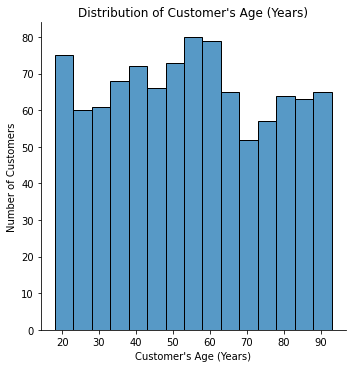

In [48]:
# The displot function is used to calculate and plot customer's age in years and the two axes ar elabelled as well
customers_age = sns.displot(customer_data["Age (Years)"], binwidth = 5, bins = 15).set_axis_labels("Customer's Age (Years)","Number of Customers")

# A suitable title is given to the plot
plt.title("Distribution of Customer's Age (Years)")

Fig 2.1 Distribution of Customer's Age (Years)

#### Data Cleaning with Seaborn library
The dependents column needs to checked and cleaned. Using the seaborn library through plot will help to identify and fix missing errors in the data.

In [49]:
#this prints out the customers with a dependant value 
customers_with_dependants = customer_data["Dependants"].count()
print(f"The number of customers with dependants are: {customers_with_dependants}")

The number of customers with dependants are: 981


Now, it's clear that 19 of the customers have their dependant fields empty or null. We can't proceed because the processing may affect the final analysis, so we fill the empty fields with the modal value.

In [50]:
customer_data["Dependants"].mode() # customer's dependant modal value

0    2.0
dtype: float64

In [51]:
# the fillna function will be used to replace the empty field with mode to attain matching data
customer_data["Dependants"] = customer_data['Dependants'].fillna(customer_data['Dependants'].mode()[0])

In [52]:
customer_data["Dependants"].count() # counts the number of customer with dependants
# That's good. We can to proceed by plotting to show the appropriate data 

1000

Text(0.5, 1.0, "Distribution of Customer's Dependant")

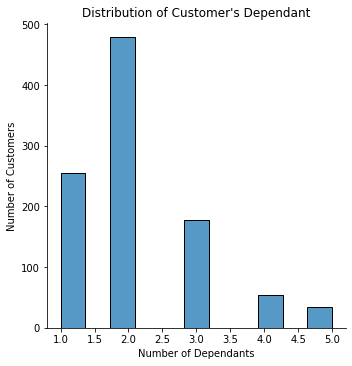

In [53]:
# The univariate histogram below shows the customers and their corresponding dependants
customers_dependants = sns.displot(customer_data["Dependants"]).set_axis_labels("Number of Dependants", "Number of Customers")
plt.title("Distribution of Customer's Dependant") #title of the plot

Fig 2.2  Distribution showing Customers with their respective Dependants


Text(0.5, 1.0, "Customer's Age relationship with Marital Status")

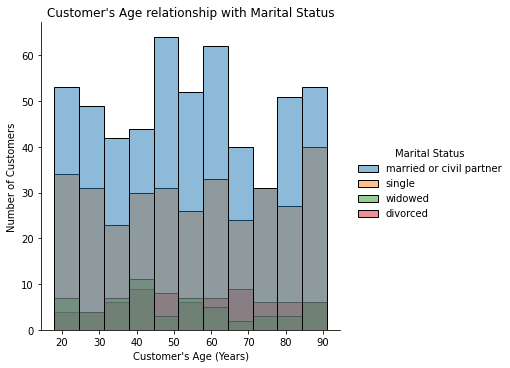

In [54]:
# The univariate histogram below shows the customers and their corresponding dependants
age_vs_customers = sns.displot(data = customer_data, x = "Age (Years)", hue = "Marital Status").set_axis_labels("Customer's Age (Years)","Number of Customers")
plt.title("Customer's Age relationship with Marital Status") #title of the plot

Fig 2.3 Customer's Age relationship with Marital Status

Text(0.5, 1.0, "The relationship between Customer's distance from work and their Yearly Salary")

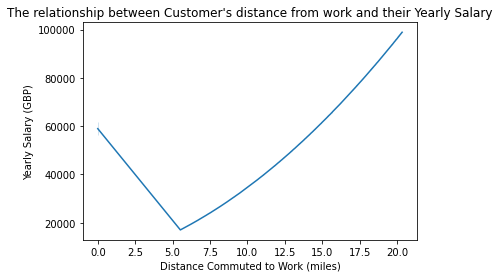

In [55]:
# This charts plotted with lineplot function shows the relationship customer's distance to work and yearly salary
work_distance_vs_salary = sns.lineplot(data = customer_data, y = "Yearly Salary (GBP)", x = "Distance Commuted to Work (miles)")
plt.title("The relationship between Customer's distance from work and their Yearly Salary")

Fig 2.4 Shows the relationship between Customer's distance from work and their Yearly Salary

Text(0.5, 1.0, "The relationship between Customer's Age and their annual Salary")

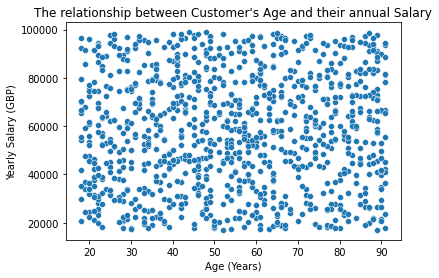

In [56]:
# The scatterplot function is used because of a large mocked data
age_vs_salary = sns.scatterplot(data = customer_data, x = "Age (Years)", y = "Yearly Salary (GBP)")
plt.title("The relationship between Customer's Age and their annual Salary")

Fig 2.5 This plot shows the relationship between Customer's Age and their annual Salary

Text(0.5, 1.0, "The relationship between Customer's Age and their Yearly Salary considering the number of dependants")

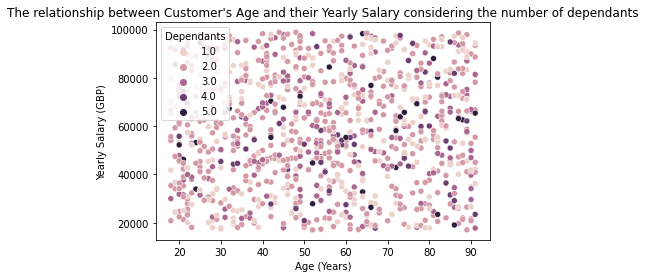

In [57]:
# This plots show customer's dependants with respect to their age and yearly salary
age_vs_salary_dependants = sns.scatterplot(data = customer_data, x = "Age (Years)", y = "Yearly Salary (GBP)", hue = "Dependants")
plt.title("The relationship between Customer's Age and their Yearly Salary considering the number of dependants")

Fig 2.6 The relationship between Customer's Age and their Yearly Salary considering the number of dependants

### Save plots as files
The univariate and multivariate plots used for presentation should be saved as png files. This is to ensure that all processed file are kept and sent to the clients for further data processing.

In [59]:
customers_age.savefig("./Distribution of Customer's Age (Years).png")
customers_dependants.savefig("./Distribution of Customer's Dependants.png")
age_vs_customers.savefig("./Customer's Age relationship with Marital Status.png")
work_distance_vs_salary.get_figure().savefig("./The relationship between Customer's distance from work and their Yearly Salary.png")
age_vs_salary.get_figure().savefig("./The relationship between Customer's Age and their annual Salary.png")
age_vs_salary_dependants.get_figure().savefig("./The relationship between Customer's Age and their Yearly Salary considering the number of dependants.png")

## Conclusion
This project was designed to extract and improve on the data provided by business professionals. The task was to prepare the given customer data in an appropriate and concise formats. However, the expectations are fulfilled which is to clean, modify, present and prepare the data and make it easier for the next stage of analysis which could be literally data mining and model development. The methods and functions created was initialy for the customer data entries provided along with several variables. New metrics were also developed to enhance the algorithm created and will work well with other other data types.  

## Reference
N. Zhang and W. F. Lu (2007), _An Efficient Data Preprocessing Method for Mining Customer Survey Data_. Vienna: 5th IEEE International Conference on Industrial Informatics, pp. 573-578, doi: 10.1109/INDIN.2007.4384821.